In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [66]:
iris = load_iris()

In [67]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [68]:
type(data1)

pandas.core.frame.DataFrame

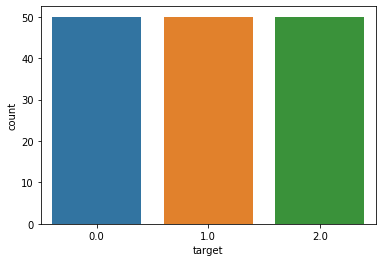

In [69]:
sns.countplot(data1["target"])

In [70]:
iris_df = data1.copy(deep=True)
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [71]:
iris_df.shape

(150, 5)

In [72]:
iris_df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [73]:
y = iris_df["target"]
iris_df.drop(columns=["target"], inplace=True)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(iris_df, y, test_size=0.20, random_state=42)

In [75]:
print("Training Data :: {}".format(X_train.shape[0]))
print("Training Target :: {}".format(y_train.shape[0]))
print("Test Data :: {}".format(X_test.shape[0]))
print("Test Target :: {}".format(y_test.shape[0]))

Training Data :: 120
Training Target :: 120
Test Data :: 30
Test Target :: 30


In [100]:
print(X_train)

     sepal_length  sepal_width  petal_length  petal_width
22            4.6          3.6           1.0          0.2
15            5.7          4.4           1.5          0.4
65            6.7          3.1           4.4          1.4
11            4.8          3.4           1.6          0.2
42            4.4          3.2           1.3          0.2
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[120 rows x 4 columns]


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


In [77]:
dt_clf = DecisionTreeClassifier(random_state=22)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [78]:
y_pred = dt_clf.predict(X_test)

In [79]:
#cross_val_score(dt_clf, X_train, y_train, cv=10, scoring="accuracy")

In [90]:
dt_clf = DecisionTreeClassifier(random_state=22)

In [92]:
# Create lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]
params = {"criterion" : criterion, "max_depth": max_depth}
clf = GridSearchCV(dt_clf, params, cv=10)

# Fit the grid search
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=22,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [93]:
print('Best Criterion:', clf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['max_depth'])
print(clf.best_estimator_.get_params())

Best Criterion: gini
Best max_depth: 6
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 22, 'splitter': 'best'}


In [94]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=22)
cross_val_score(dt_clf, X_train, y_train, cv=10, scoring="accuracy")


array([0.91666667, 1.        , 1.        , 1.        , 0.66666667,
       0.83333333, 1.        , 0.91666667, 0.91666667, 0.91666667])

In [95]:
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

In [96]:
print("accuracy", accuracy_score(y_test, y_pred))


accuracy 1.0


In [97]:
print("f1 score macro",f1_score(y_test, y_pred, average='macro'))    

f1 score macro 1.0


In [87]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [88]:
y_test_ovr = label_binarize(y_test, classes=[0, 1, 2])
y_pred_ovr = label_binarize(y_pred, classes=[0, 1, 2])

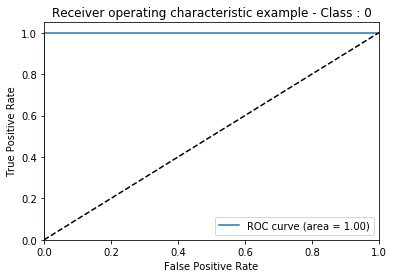

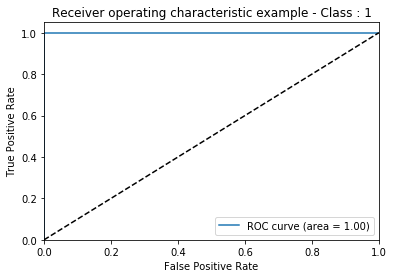

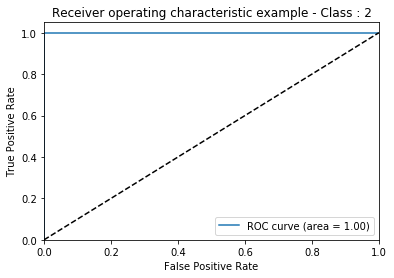

In [89]:
n_classes = 3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_ovr[:, i], y_pred_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example - Class : {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()